### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Мироноа Дмитрий Андреевич
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант №6

Контрольная работа 4 – Вариант 6
1. Набор данных: titanic
2. Независимые признаки: age, fare
3. Метка класса: embarked
4. Показатель бинарной классификации:
𝐹𝑁 (False Negatives) – число точек в положительном классе, ошибочно спрогнозированных в отрицательный класс
5. Параметры нейронных сетей:
Кол-во скрытых слоев: 3
Кол-во нейронов в слое: 128
Оптимизатор: AdamW
Функции активации в скрытых слоях: elu, sigmoid, tanh


1.	Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса. Оставьте в наборе признаки, принимающие числовые значения.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
ds= tfds.load("titanic", split='train')
df = tfds.as_dataframe(ds)
df.drop(columns=['boat','cabin','home.dest','name','ticket'], inplace=True)
df.head()

,age,body,embarked,fare,parch,pclass,sex,sibsp,survived
0,30.0,-1,2,13.0000,0,1,0,0,0
1,37.0,98,2,7.9250,0,2,0,2,0
2,28.0,-1,2,13.0000,0,1,1,0,1
3,18.0,-1,2,73.5000,0,1,0,0,0
4,-1.0,-1,0,7.8958,0,2,0,0,0


2.	Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами(принцип разбиения: погибшие и выжившие). Подпишите оси и рисунок, создайте легенду для классов набора данных.

Количество выживших: 500
Количество погибших: 809


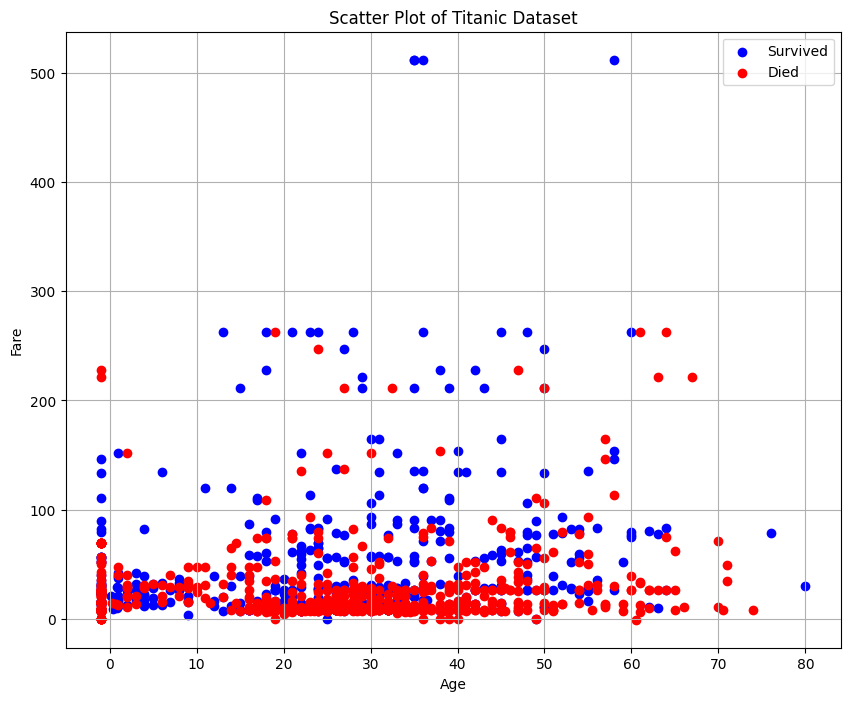

In [ ]:
d = df[['age', 'fare', 'survived']]
d = d.dropna()
survived = d[d['survived'] == 1]
died = d[d['survived'] == 0]
survived_counts = d['survived'].value_counts()
print("Количество выживших:", survived_counts[1])
print("Количество погибших:", survived_counts[0])
plt.figure(figsize=(10, 8))
plt.scatter(survived['age'], survived['fare'], color='blue', label='Survived')
plt.scatter(died['age'], died['fare'], color='red', label='Died')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Titanic Dataset')

plt.legend()

plt.grid(True)
plt.show()

3.	Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.  

In [ ]:
df['embarked'].value_counts().sort_index()

embarked
0    270
1    123
2    914
3      2
Name: count, dtype: int64

In [ ]:
df_binary = df.copy()
df_binary['embarked'] = df_binary['embarked'].apply(lambda x: 1 if x in [2] else 0)
df_binary['embarked'].value_counts()

embarked
1    914
0    395
Name: count, dtype: int64

из данного результата видно, что разбить даже примерно поровну не удастся, единственное, что можно сделать, это изменить метку класса например на pclass(остальные признаки тоже нельзя отсортировать равномерно) и тогда результаты будут следующие:


In [ ]:
df['pclass'].value_counts().sort_index()

pclass
0    323
1    277
2    709
Name: count, dtype: int64

In [ ]:
df_binary = df.copy()
df_binary_1 = df_binary['pclass'] = df_binary['pclass'].apply(lambda x: 1 if x in [2] else 0)
df_binary_1.value_counts()

pclass
1    709
0    600
Name: count, dtype: int64

И в таком случае результаты будут примерно равны, поэтому дальше будет использоваться pclass в качестве метки класса

4.	Разбейте набор данных из двух признаков и бинарных меток класса на обучающую и тестовую выборки. Постройте нейронные сети с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите их на обучающей выборке, контролируя процесс обучения нейронных сетей. Определите нейронную сеть с более высоким качеством бинарной классификации по показателю бинарной классификации, указанному в индивидуальном задании.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import AdamW
from sklearn.metrics import confusion_matrix

# Разделение на признаки (X) и метку класса (y)
X = df[['age', 'fare']]
y = df_binary_1
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание нейронной сети
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='elu', input_shape=(2,)))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(128, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Компиляция модели с оптимизатором AdamW
model = create_model()
model.compile(optimizer=AdamW(), loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Прогнозирование на тестовой выборке
y_pred_prob = model.predict(X_test_scaled)
y_pred = y_pred_prob.argmax(axis=1)

# Оценка производительности на тестовой выборке
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Подсчет False Negatives
fn = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
print("False Negatives for each class:", fn)


Epoch 1/100
33/33 [==============================] - 3s 5ms/step - loss: 0.5796 - accuracy: 0.6896
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4887 - accuracy: 0.7660
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.4710 - accuracy: 0.7641
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.7794
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.4536 - accuracy: 0.7927
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 0.4562 - accuracy: 0.7841
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.4493 - accuracy: 0.7956
Epoch 8/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4534 - accuracy: 0.7889
Epoch 9/100
33/33 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.7899
Epoch 10/100
33/33 [==============================] - 0s 9ms/step - loss: 0.4440 - accuracy: 0.7889
Epoch 11/

5.	Визуализируйте границы принятия решений построенных нейронных сетей на отдельных рисунках на всем наборе данных из двух признаков и бинарных меток классов.  

313/313 [==============================] - 0s 1ms/step


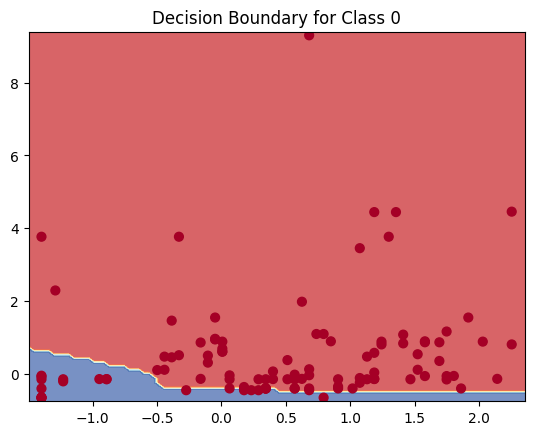

313/313 [==============================] - 1s 2ms/step


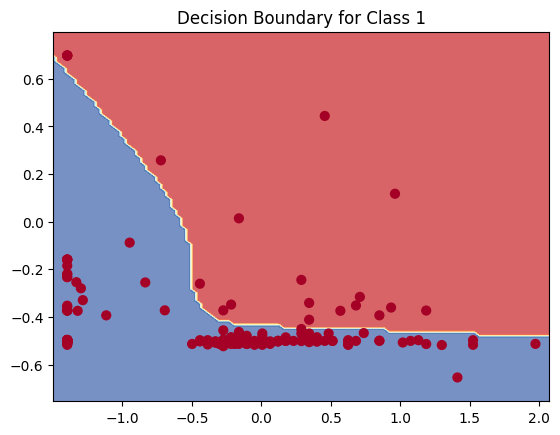

In [ ]:
def plot_decision_boundary(model, X, y, class_label):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    X_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_in)
    if len(y_pred[0]) > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'Decision Boundary for Class {class_label}')
    plt.show()


for class_label in np.unique(y_test):
    indices = np.where(y_test == class_label)[0]
    indices = np.array(indices)
    X_class = X_test_scaled[indices]
    y_class = y_test.iloc[indices]
    plot_decision_boundary(model, X_class, y_class, class_label)



6.	Визуализируйте на одном рисунке ROC-кривые для построенных классификаторов на основе нейронных сетей, вычислите площади под ROC-кривыми методом трапеций или иным методом и создайте легенду с указанием площадей кривых.

9/9 [==============================] - 0s 2ms/step


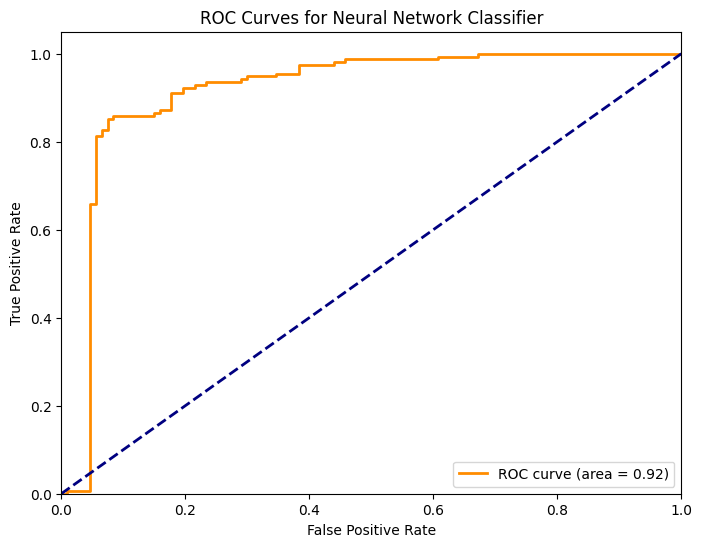

In [ ]:
from sklearn.metrics import roc_curve, auc
# Предсказание вероятностей классов для каждого классификатора
y_pred_prob_nn = model.predict(X_test_scaled).ravel()  # Преобразуем предсказания в одномерный массив

# Вычисление ROC-кривых и площадей под ними
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Визуализация ROC-кривых
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network Classifier')
plt.legend(loc="lower right")
plt.show()

7.	Определите исходном наборе данных дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и имеющий максимальную дисперсию.  

In [ ]:
df.head()

,age,body,embarked,fare,parch,pclass,sex,sibsp,survived
0,30.0,-1,2,13.0000,0,1,0,0,0
1,37.0,98,2,7.9250,0,2,0,2,0
2,28.0,-1,2,13.0000,0,1,1,0,1
3,18.0,-1,2,73.5000,0,1,0,0,0
4,-1.0,-1,0,7.8958,0,2,0,0,0


Из таблицы исходного набора данных можно сделать вывод, что кроме fare и age неприрывных признаков больше нет, поэтому найдем дополнительный признак просто с максимальной дисперсией

In [ ]:
data_frame = df.copy()
data_frame.drop(columns=['age','fare'], inplace=True)
additional_feature = data_frame.var().idxmax()
variances = data_frame.var()
print(variances)
print("Дополнительный признак с максимальной дисперсией:", additional_feature)

body        3073.846792
embarked       0.666069
parch          0.749195
pclass         0.701969
sex            0.229438
sibsp          1.085052
survived       0.236250
dtype: float64
Дополнительный признак с максимальной дисперсией: body


8.	Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

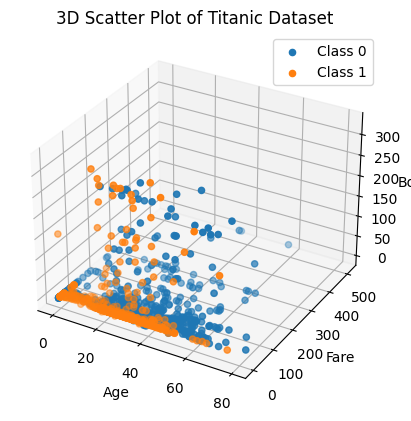

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создаем трехмерный график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Разделение точек по классам
for class_label in df_binary_1.unique():
    class_data = df[df_binary_1 == class_label]
    ax.scatter(class_data['age'], class_data['fare'], class_data['body'], label=f'Class {class_label}')

# Настройка подписей осей и заголовка
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Body')
plt.title('3D Scatter Plot of Titanic Dataset')

# Добавление легенды
plt.legend()

# Показать график
plt.show()


9.	Разбейте исходный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть для многоклассовой классификации с нормализующим слоем и параметрами, соответствующими лучшей нейронной сети для бинарной классифиации из п.4, и обучите ее на обучающей выборке, контролируя процесс ее обучения.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

# Разделение на признаки (X) и метку класса (y)
X = df[['age', 'fare', 'body']]  # Включаем дополнительный признак 'body'
y = df['pclass']  # Предполагаем, что метка класса называется 'class'

# Преобразование меток классов в категориальные переменные
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание нейронной сети для многоклассовой классификации
def create_multiclass_model():
    model = Sequential()
    model.add(Dense(128, activation='elu', input_shape=(3,)))  # Теперь входной слой имеет 3 нейрона
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(128, activation='tanh'))
    model.add(Dense(3, activation='softmax'))  # Выходной слой с тремя нейронами для трех классов
    return model

# Компиляция модели с оптимизатором AdamW и функцией потерь categorical_crossentropy
model = create_multiclass_model()
model.compile(optimizer=AdamW(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# Оценка производительности на тестовой выборке
accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Accuracy on test set:", accuracy)


Epoch 1/100
33/33 [==============================] - 1s 10ms/step - loss: 0.8846 - accuracy: 0.6208 - val_loss: 0.6849 - val_accuracy: 0.7328
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.7011 - val_loss: 0.5916 - val_accuracy: 0.7672
Epoch 3/100
33/33 [==============================] - 0s 8ms/step - loss: 0.6612 - accuracy: 0.7058 - val_loss: 0.6528 - val_accuracy: 0.7137
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.6665 - accuracy: 0.7087 - val_loss: 0.6849 - val_accuracy: 0.7366
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6551 - accuracy: 0.7058 - val_loss: 0.5969 - val_accuracy: 0.7595
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6529 - accuracy: 0.7221 - val_loss: 0.5952 - val_accuracy: 0.7748
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.6475 - accuracy: 0.7154 - val_loss: 0.5879 - val_accuracy: 0.7863
Epoch 8/100


Из статистики обучения можно сделать вывод, что нейронная сеть обучилась, т.к значение accuracy увеличивается, а значение loss уменьшается

10.	Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

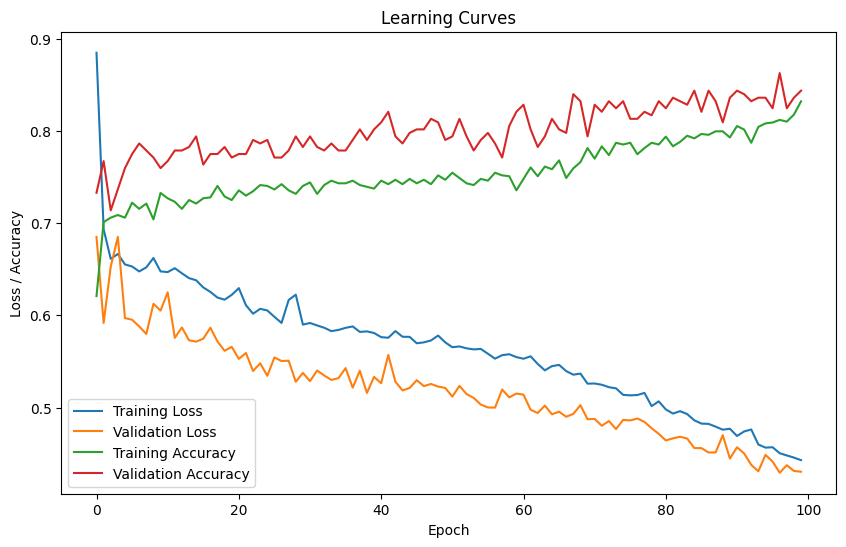

In [ ]:
# Построение кривых обучения
plt.figure(figsize=(10, 6))

# Функция потерь на обучающем и тестовом наборах данных
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Метрика точности на обучающем и тестовом наборах данных
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Настройка осей и заголовка
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Learning Curves')
plt.legend()

# Показать график
plt.show()
